In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import pandas as pd

2025-06-01 13:12:57.815511: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-01 13:12:59.578447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748763780.161335   20075 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748763780.305053   20075 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748763781.596816   20075 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
cnn = tf.keras.models.load_model('../models/trained_plant_disease_model.keras')

2025-06-01 13:27:57.675428: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


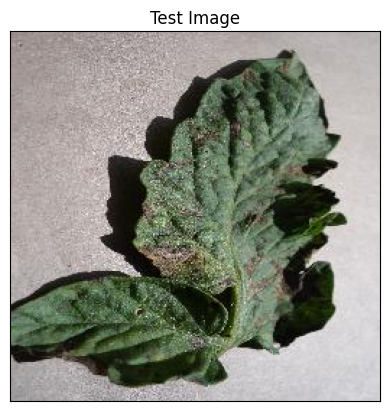

In [13]:
image_path = '../test_images/tomatoearlyblight.png'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [42]:
print(predictions)

[[1.11617361e-07 7.13863768e-09 1.54894708e-09 4.21963376e-12
  1.09023879e-12 7.04235781e-10 3.16295254e-12 7.10530400e-01
  1.13490780e-04 1.13116687e-06 2.81189982e-09 6.23309063e-07
  5.05903627e-05 1.64233788e-05 2.33818227e-13 8.58428259e-11
  6.77423941e-07 7.40118958e-14 1.55295362e-04 9.93598606e-12
  9.98803298e-04 7.44544026e-09 2.20628280e-08 1.68550989e-11
  4.97287053e-13 4.75710209e-08 2.82564253e-01 6.92534528e-12
  1.80213718e-07 4.56600403e-03 1.00201217e-03 1.10835681e-11
  2.01230121e-09 3.21693477e-10 1.04345005e-10 1.15905507e-09
  8.18700088e-13 1.14428067e-09]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

18


In [11]:
df = pd.read_csv('../Labels/labels.csv')
plant_disease_class_name = list(df['Plant_Disease_Labels'])

In [ ]:
insects = {'Adristyrannus': 0, 'Aleurocanthus spiniferus': 1, 'Ampelophaga': 2, 'Aphis citricola Vander Goot': 3, 'Apolygus lucorum': 4, 'Bactrocera tsuneonis': 5, 'Beet spot flies': 6, 'Black hairy': 7, 'Brevipoalpus lewisi McGregor': 8, 'Ceroplastes rubens': 9, 'Chlumetia transversa': 10, 'Chrysomphalus aonidum': 11, 'Cicadella viridis': 12, 'Cicadellidae': 13, 'Colomerus vitis': 14, 'Dacus dorsalis(Hendel)': 15, 'Dasineura sp': 16, 'Deporaus marginatus Pascoe': 17, 'Erythroneura apicalis': 18, 'Field Cricket': 19, 'Fruit piercing moth': 20, 'Gall fly': 21, 'Icerya purchasi Maskell': 22, 'Indigo caterpillar': 23, 'Jute Stem Weevil': 24, 'Jute aphid': 25, 'Jute hairy': 26, 'Jute red mite': 27, 'Jute semilooper': 28, 'Jute stem girdler': 29, 'Jute stick insect': 30, 'Lawana imitata Melichar': 31, 'Leaf beetle': 32, 'Limacodidae': 33, 'Locust': 34, 'Locustoidea': 35, 'Lycorma delicatula': 36, 'Mango flat beak leafhopper': 37, 'Mealybug': 38, 'Miridae': 39, 'Nipaecoccus vastalor': 40, 'Panonchus citri McGregor': 41, 'Papilio xuthus': 42, 'Parlatoria zizyphus Lucus': 43, 'Phyllocnistis citrella Stainton': 44, 'Phyllocoptes oleiverus ashmead': 45, 'Pieris canidia': 46, 'Pod borer': 47, 'Polyphagotars onemus latus': 48, 'Potosiabre vitarsis': 49, 'Prodenia litura': 50, 'Pseudococcus comstocki Kuwana': 51, 'Rhytidodera bowrinii white': 52, 'Rice Stemfly': 53, 'Salurnis marginella Guerr': 54, 'Scirtothrips dorsalis Hood': 55, 'Spilosoma Obliqua': 56, 'Sternochetus frigidus': 57, 'Termite': 58, 'Termite odontotermes (Rambur)': 59, 'Tetradacus c Bactrocera minax': 60, 'Thrips': 61, 'Toxoptera aurantii': 62, 'Toxoptera citricidus': 63, 'Trialeurodes vaporariorum': 64, 'Unaspis yanonensis': 65, 'Viteus vitifoliae': 66, 'Xylotrechus': 67, 'Yellow Mite': 68, 'alfalfa plant bug': 69, 'alfalfa seed chalcid': 70, 'alfalfa weevil': 71, 'aphids': 72, 'army worm': 73, 'asiatic rice borer': 74, 'beet army worm': 75, 'beet fly': 76, 'beet weevil': 77, 'beetle': 78, 'bird cherry-oataphid': 79, 'black cutworm': 80, 'blister beetle': 81, 'bollworm': 82, 'brown plant hopper': 83, 'cabbage army worm': 84, 'cerodonta denticornis': 85, 'corn borer': 86, 'corn earworm': 87, 'cutworm': 88, 'english grain aphid': 89, 'fall armyworm': 90, 'flax budworm': 91, 'flea beetle': 92, 'grain spreader thrips': 93, 'grasshopper': 94, 'green bug': 95, 'grub': 96, 'large cutworm': 97, 'legume blister beetle': 98, 'longlegged spider mite': 99, 'lytta polita': 100, 'meadow moth': 101, 'mites': 102, 'mole cricket': 103, 'odontothrips loti': 104, 'oides decempunctata': 105, 'paddy stem maggot': 106, 'parathrene regalis': 107, 'peach borer': 108, 'penthaleus major': 109, 'red spider': 110, 'rice gall midge': 111, 'rice leaf caterpillar': 112, 'rice leaf roller': 113, 'rice leafhopper': 114, 'rice shell pest': 115, 'rice water weevil': 116, 'sawfly': 117, 'sericaorient alismots chulsky': 118, 'small brown plant hopper': 119, 'stem borer': 120, 'tarnished plant bug': 121, 'therioaphis maculata Buckton': 122, 'wheat blossom midge': 123, 'wheat phloeothrips': 124, 'wheat sawfly': 125, 'white backed plant hopper': 126, 'white margined moth': 127, 'whitefly': 128, 'wireworm': 129, 'yellow cutworm': 130, 'yellow rice borer': 131}

class_name = list(temp.keys())

18
Pepper_bell___Bacterial_spot


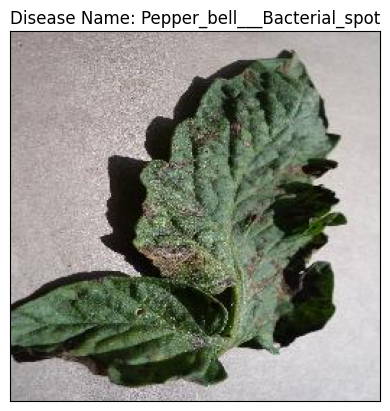

In [15]:
# Displaying the disease prediction
print(result_index)
model_prediction = plant_disease_class_name[result_index]
print(model_prediction)
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [61]:
import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model

# Load the joblib model
joblib_model = joblib.load("models/pest_prediction_model.joblib")

# This function wraps the joblib model's predict method.
# It converts the input tensor to numpy, applies predict, and returns a tensor.
def sklearn_predict(x):
	result = joblib_model.predict(x.numpy())
	return tf.convert_to_tensor(result, dtype=tf.float32)

# Wrap the predict function into a Keras Lambda layer using tf.py_function.
wrapped_predict = Lambda(lambda x: tf.py_function(func=sklearn_predict, inp=[x], Tout=tf.float32))

# Determine the expected input shape. If the joblib model defines n_features_in_, use it; otherwise, adjust accordingly.
input_shape = (joblib_model.n_features_in_,) if hasattr(joblib_model, "n_features_in_") else (10,)
inputs = Input(shape=input_shape)
outputs = wrapped_predict(inputs)
keras_model = Model(inputs, outputs)

# Save the converted model in Keras format.
keras_model.save("models/pest_prediction_model.keras")

NotImplementedError: Exception encountered when calling Lambda.call().

[1mWe could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.[0m

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 15), dtype=float32, sparse=False, ragged=False, name=keras_tensor_210>',)
  • kwargs={'mask': 'None'}